In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [6]:
df=pd.read_csv('spam.csv',encoding="latin1")

In [17]:
df2=pd.DataFrame({'Label':df['v1'],'Message':df['v2']})
df2.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

In [22]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ankit65.singh/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ankit65.singh/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [45]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full content of each column
pd.set_option('display.expand_frame_repr', False)  # Prevent column wrapping

In [20]:
ps=PorterStemmer()

In [25]:
# print(word_tokenize(df2['Message'][0]))

['Go', 'until', 'jurong', 'point', ',', 'crazy', '..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']


In [42]:
df2['Message'][0]=" ".join([ps.stem(word.lower()) for word in word_tokenize(df2['Message'][0]) if word not in stop_words ])

/var/folders/7l/kngd77h10m12cmpn_4fmhp88yf_nxm/T/ipykernel_55790/2782187541.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2['Message'][0]=" ".join([ps.stem(word.lower()) for word in word_tokenize(df2['Message'][0]) if word not in sto

In [46]:
df2.head()

,Label,Message
0,ham,"go jurong point , crazi .. avail bugi n great world la e buffet ... cine got amor wat ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [47]:
for i in range(1,len(df2['Message'])):
    df2['Message'][i]=" ".join([ps.stem(word.lower()) for word in word_tokenize(df2['Message'][i]) if word not in stop_words ])


/var/folders/7l/kngd77h10m12cmpn_4fmhp88yf_nxm/T/ipykernel_55790/925258416.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2['Message'][i]=" ".join([ps.stem(word.lower()) for word in word_tokenize(df2['Message'][i]) if word not in stop

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


In [49]:
df2.head()

,Label,Message
0,ham,"go jurong point , crazi .. avail bugi n great world la e buffet ... cine got amor wat ..."
1,ham,ok lar ... joke wif u oni ...
2,spam,free entri 2 wkli comp win fa cup final tkt 21st may 2005 . text fa 87121 receiv entri question ( std txt rate ) t & c 's appli 08452810075over18 's
3,ham,u dun say earli hor ... u c alreadi say ...
4,ham,"nah i n't think goe usf , live around though"


In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [70]:
cv=CountVectorizer(max_features=2500)

In [71]:
X=cv.fit_transform(df2['Message']).toarray()
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [72]:
y=pd.get_dummies(df2['Label'])

In [77]:
print(y.iloc[:,1].values)

[False False  True ... False False False]


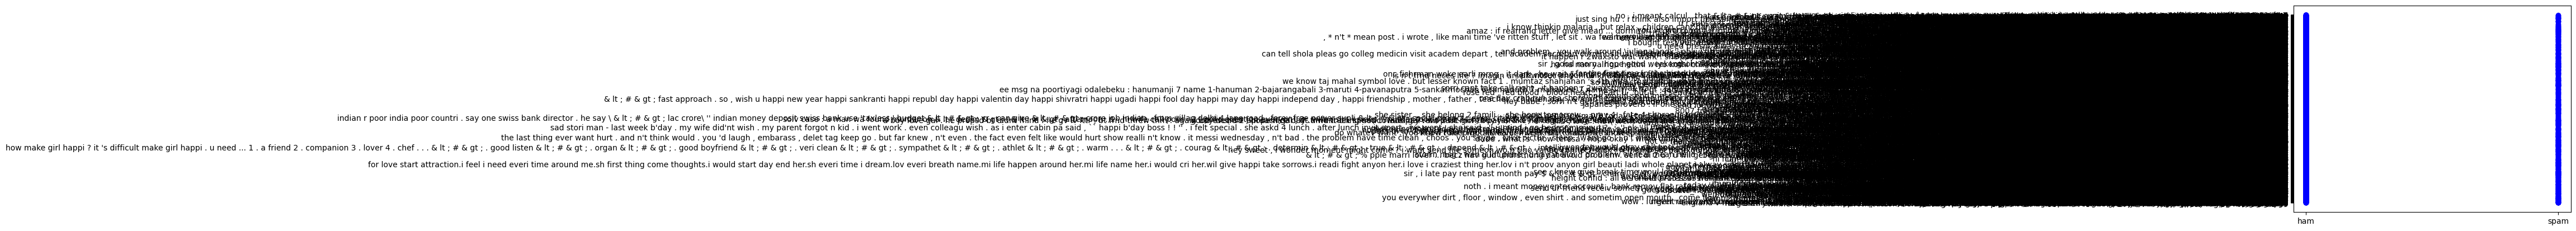